In [19]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import minimize

# Load the dataset from the specified file path
file_path = 'ex2data1.csv'
df = pd.read_csv(file_path, header=None)

# Rename columns for better readability
df.rename(columns={0: 'exam1', 1: 'exam2', 2: 'y'}, inplace=True)

# Display the first few rows of the dataframe
print("Dataset preview:")
print(df.head())

Dataset preview:
       exam1      exam2  y
0  34.623660  78.024693  0
1  30.286711  43.894998  0
2  35.847409  72.902198  0
3  60.182599  86.308552  1
4  79.032736  75.344376  1


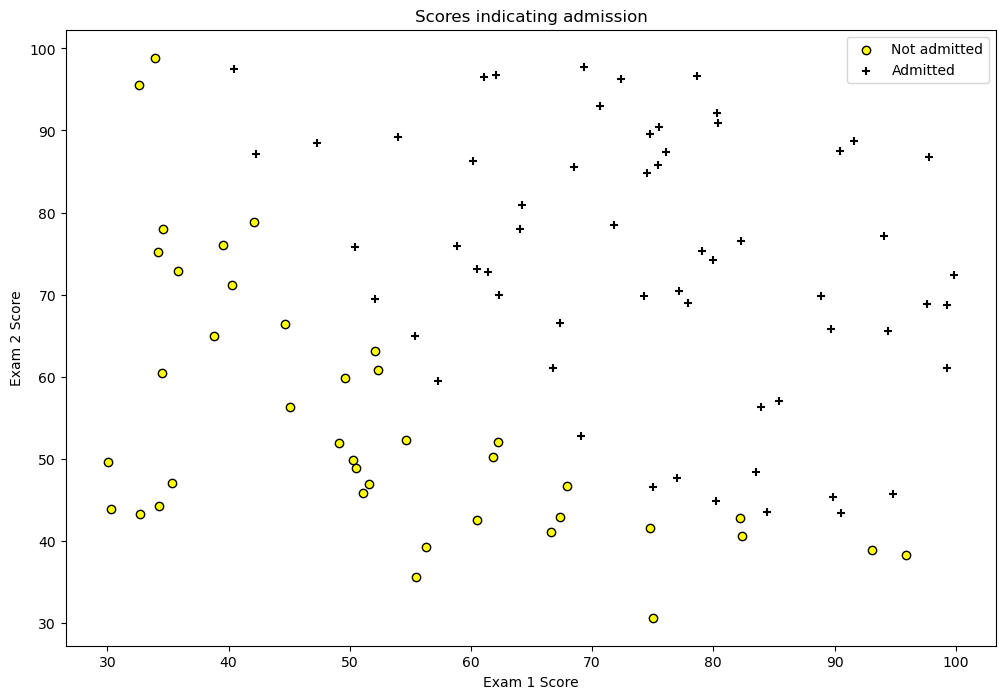

In [20]:
# Create a new figure with specified size
fig = plt.figure(figsize=(12, 8))

# Plot data for not admitted students
plt.scatter(
    df[df['y'] == 0]['exam1'],  # Scores of exam 1 for not admitted students
    df[df['y'] == 0]['exam2'],  # Scores of exam 2 for not admitted students
    label='Not admitted',       # Label for legend
    color='yellow',             # Color of the points
    edgecolor='black'           # Edge color of the points
)

# Plot data for admitted students
plt.scatter(
    df[df['y'] == 1]['exam1'],  # Scores of exam 1 for admitted students
    df[df['y'] == 1]['exam2'],  # Scores of exam 2 for admitted students
    label='Admitted',           # Label for legend
    marker='+',                 # Marker type
    color='black'               # Color of the points
)

# Set the x-axis label
plt.xlabel('Exam 1 Score')

# Set the y-axis label
plt.ylabel('Exam 2 Score')

# Add a legend in the upper right corner
plt.legend(loc='upper right')

# Add a title to the plot
plt.title('Scores indicating admission')

# Display the plot
plt.show()


In [31]:
class LogisticRegression(object):
    def __init__(self, x, y, alpha=0.001, n_iterations=5000):
        self.x = self._hstack_one(x)  # Add a column of ones to x
        self.y = y  # Target variable
        self.thetas = np.zeros((self.x.shape[1]))  # Initialize thetas (weights) to zeros
        self.n_rows = self.x.shape[0]  # Number of rows in x
        self.alpha = alpha  # Learning rate
        self.n_iterations = n_iterations  # Number of iterations for gradient descent
        print("Cost Before Fitting: {0:.4f}".format(self.cost()))  # Print initial cost

    @staticmethod
    def _hstack_one(input_matrix):
        """ Add a column of ones to the input matrix. """
        if len(input_matrix.shape) == 1:
            return np.hstack((np.array([1]), input_matrix))
        else:
            return np.hstack((np.ones((input_matrix.shape[0], 1)), input_matrix))

    @staticmethod
    def sigmoid(x):
        """ Compute the sigmoid of x. """
        return 1 / (1 + np.exp(-x))

    def cost(self, thetas=None):
        """ Compute the cost function. """
        if thetas is None:
            thetas = self.thetas
        dot_prod = self.x.dot(thetas)
        dot_prod_pos = dot_prod[self.y == 1]
        dot_prod_neg = dot_prod[self.y == 0]
        cost = -(1 / self.n_rows) * (np.sum(np.log(self.sigmoid(dot_prod_pos))) + np.sum(np.log(1 - self.sigmoid(dot_prod_neg))))
        return cost

    def predict(self, new_x, threshold=0.5):
        """ Predict the class label for new data. """
        assert new_x.shape[0] == self.x.shape[1] - 1, "Number of features don't match. {0} != {1}".format(new_x.shape[0], self.x.shape[1] - 1)
        new_x = self._hstack_one(new_x)
        h = new_x.dot(self.thetas)
        return self.sigmoid(h) >= threshold

    def batch_gradient(self, thetas=None):
        """ Compute the gradient of the cost function. """
        if thetas is None:
            thetas = self.thetas
        h = self.sigmoid(self.x.dot(thetas)) - self.y
        h = np.multiply(self.x, h.reshape(-1, 1))
        h = np.sum(h, axis=0)
        return h

    def batch_gradient_descent(self):
        """ Perform batch gradient descent to fit the model. """
        alpha_by_m = self.alpha / self.n_rows
        for i in range(self.n_iterations):
            self.thetas = self.thetas - (alpha_by_m * self.batch_gradient())
            cost = self.cost()
            print(f"Iteration: {i+1}, Loss: {cost:.5f}")

    def scipy_optimize(self):
        """ Use scipy's minimize function to fit the model. """
        result = minimize(self.cost, self.thetas, jac=self.batch_gradient, options={'maxiter': self.n_iterations})
        print(result)
        self.thetas = result.x

# Usage Example
# Assuming df is a DataFrame with 'exam1' and 'exam2' columns for features and 'y' column for the target
# Replace 'df' with your actual DataFrame variable
lr = LogisticRegression(df[['exam1', 'exam2']].values, df['y'].values, n_iterations=20000, alpha=0.001)
optim_theta = lr.scipy_optimize()
print("Cost after converging: {0:.3f}".format(lr.cost()))


Cost Before Fitting: 0.6931
  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 0.20349770159874744
        x: [-2.516e+01  2.062e-01  2.015e-01]
      nit: 77
      jac: [-3.847e-07 -2.481e-05 -2.634e-05]
 hess_inv: [[ 2.083e+01 -1.688e-01 -1.809e-01]
            [-1.688e-01  1.439e-03  1.403e-03]
            [-1.809e-01  1.403e-03  1.643e-03]]
     nfev: 309
     njev: 292
Cost after converging: 0.203


C:\Users\men_l\AppData\Local\Temp\ipykernel_35680\3324761955.py:31: RuntimeWarning: divide by zero encountered in log
  cost = -(1 / self.n_rows) * (np.sum(np.log(self.sigmoid(dot_prod_pos))) + np.sum(np.log(1 - self.sigmoid(dot_prod_neg))))
C:\Users\men_l\AppData\Local\Temp\ipykernel_35680\3324761955.py:31: RuntimeWarning: divide by zero encountered in log
  cost = -(1 / self.n_rows) * (np.sum(np.log(self.sigmoid(dot_prod_pos))) + np.sum(np.log(1 - self.sigmoid(dot_prod_neg))))
